In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime  
from datetime import date, timedelta 
import calendar 
%matplotlib inline

In [2]:
df1=pd.read_csv('NADAC__National_Average_Drug_Acquisition_Cost_.csv')

In [3]:
df1.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,ENEMA,536741551,0.00649,03/18/2015,ML,C/I,Y,"1, 5",G,NaN,NaN,03/25/2015
1,SEBEX SHAMPOO,536196297,0.02131,03/18/2015,ML,C/I,Y,"1, 5",G,NaN,NaN,04/01/2015
2,SIMVASTATIN 80 MG TABLET,24658030410,0.07795,02/17/2016,EA,C/I,N,1,G,NaN,NaN,03/16/2016
3,LYRICA 200 MG CAPSULE,71101768,5.63640,01/01/2016,EA,C/I,N,2,B,NaN,NaN,03/16/2016
4,RABEPRAZOLE SOD DR 20 MG TAB,65162072409,0.68732,02/17/2016,EA,C/I,N,1,G,NaN,NaN,03/16/2016


In [4]:
df1.dtypes

NDC Description                               object
NDC                                            int64
NADAC_Per_Unit                               float64
Effective_Date                                object
Pricing_Unit                                  object
Pharmacy_Type_Indicator                       object
OTC                                           object
Explanation_Code                              object
Classification_for_Rate_Setting               object
Corresponding_Generic_Drug_NADAC_Per_Unit    float64
Corresponding_Generic_Drug_Effective_Date     object
As of Date                                    object
dtype: object

In [5]:
df1['NDC']=df1['NDC'].astype('str')
df1.dtypes

NDC Description                               object
NDC                                           object
NADAC_Per_Unit                               float64
Effective_Date                                object
Pricing_Unit                                  object
Pharmacy_Type_Indicator                       object
OTC                                           object
Explanation_Code                              object
Classification_for_Rate_Setting               object
Corresponding_Generic_Drug_NADAC_Per_Unit    float64
Corresponding_Generic_Drug_Effective_Date     object
As of Date                                    object
dtype: object

In [6]:
df2=df1.dropna(subset = ["Corresponding_Generic_Drug_NADAC_Per_Unit"])

In [7]:
df2.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
5941,ZONEGRAN 100 MG CAPSULE,62856068010,11.42626,01/20/2016,EA,C/I,N,2,B,0.14745,02/17/2016 12:00:00 AM,03/16/2016
5942,LEVOXYL 125 MCG TABLET,60793085601,0.67966,01/01/2016,EA,C/I,N,"4, 6",B,0.49304,02/17/2016 12:00:00 AM,03/16/2016
5953,DEPAKOTE ER 250 MG TABLET,74382613,2.81945,01/20/2016,EA,C/I,N,4,B,1.23631,02/17/2016 12:00:00 AM,03/16/2016
6000,DELSYM 30 MG/5 ML SUSPENSION,63824017163,0.08502,02/17/2016,ML,C/I,Y,"1, 5",B,0.05507,02/17/2016 12:00:00 AM,03/16/2016
6008,CARDIZEM LA 240 MG TABLET,187204790,4.42920,12/23/2015,EA,C/I,N,4,B,2.55889,02/17/2016 12:00:00 AM,03/16/2016


In [8]:
df2.shape

(403116, 12)

In [9]:
df_price=df1[['NDC Description','NDC','NADAC_Per_Unit','Effective_Date','OTC','Classification_for_Rate_Setting']]

In [10]:
df_price = df_price.drop_duplicates()

In [11]:
df_price.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,OTC,Classification_for_Rate_Setting
0,ENEMA,536741551,0.00649,03/18/2015,Y,G
1,SEBEX SHAMPOO,536196297,0.02131,03/18/2015,Y,G
2,SIMVASTATIN 80 MG TABLET,24658030410,0.07795,02/17/2016,N,G
3,LYRICA 200 MG CAPSULE,71101768,5.63640,01/01/2016,N,B
4,RABEPRAZOLE SOD DR 20 MG TAB,65162072409,0.68732,02/17/2016,N,G


In [12]:
df_price['NDC'].unique().size

42121

In [13]:
df_price['NDC Description'].unique().size

8698

In [14]:
df_price[df_price['NDC Description']=='ENEMA']

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,OTC,Classification_for_Rate_Setting
0,ENEMA,536741551,0.00649,03/18/2015,Y,G
281,ENEMA,24385003928,0.00659,09/23/2015,Y,G
1251,ENEMA,536741551,0.00600,08/20/2014,Y,G
2382,ENEMA,536741551,0.00594,10/22/2014,Y,G
3250,ENEMA,24385003928,0.00618,02/18/2015,Y,G
...,...,...,...,...,...,...
7533753,ENEMA,536741551,0.00605,11/20/2019,Y,G
7637709,ENEMA,536741551,0.00581,12/18/2019,Y,G
7771622,ENEMA,536741551,0.00606,01/22/2020,Y,G
7848946,ENEMA,536741551,0.00585,02/19/2020,Y,G


In [15]:
df_price.sort_values(by=['NDC'])

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,OTC,Classification_for_Rate_Setting
677033,FENTANYL 0.05 MG/ML AMPUL,10019003539,0.64500,11/19/2014,N,G
702234,FENTANYL 0.05 MG/ML AMPUL,10019003539,0.61275,01/21/2015,N,G
823853,FENTANYL 100 MCG/2 ML VIAL,10019003727,0.40328,05/21/2014,N,G
947808,FENTANYL 100 MCG/2 ML VIAL,10019003727,0.51134,10/24/2013,N,G
777981,FENTANYL 0.05 MG/ML VIAL,10019003739,0.51134,10/24/2013,N,G
...,...,...,...,...,...,...
3842159,MAXIDEX 0.1% EYE DROPS,998061505,13.85675,01/04/2017,N,B
7199193,MAXIDEX 0.1% EYE DROPS,998061505,14.50720,08/21/2019,N,B
786994,MAXIDEX 0.1% EYE DROPS,998061505,11.93960,08/20/2014,N,B
23264,MAXIDEX 0.1% EYE DROPS,998061505,13.41470,07/01/2015,N,B


In [16]:
df_price['NDC']=df_price['NDC'].apply('{:0>11}'.format)

In [17]:
df_price.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,OTC,Classification_for_Rate_Setting
0,ENEMA,00536741551,0.00649,03/18/2015,Y,G
1,SEBEX SHAMPOO,00536196297,0.02131,03/18/2015,Y,G
2,SIMVASTATIN 80 MG TABLET,24658030410,0.07795,02/17/2016,N,G
3,LYRICA 200 MG CAPSULE,00071101768,5.63640,01/01/2016,N,B
4,RABEPRAZOLE SOD DR 20 MG TAB,65162072409,0.68732,02/17/2016,N,G


In [18]:
def findDay(date): 
    month, day, year = (int(i) for i in date.split('/'))     
    born = datetime.date(year, month, day) 
    return born.strftime("%A")


In [19]:
df_price['Effective_Date'].apply(findDay)

0          Wednesday
1          Wednesday
2          Wednesday
3             Friday
4          Wednesday
             ...    
7994108    Wednesday
7994215    Wednesday
7994339    Wednesday
7994582     Saturday
7995236    Wednesday
Name: Effective_Date, Length: 1599537, dtype: object

In [20]:
def wednesday(date): 
    month, day, year = (int(i) for i in date.split('/'))     
    born = datetime.date(year, month, day) 
    t=born.weekday()
    newdate=born-timedelta(days=t-2)
    return newdate

In [21]:
wednesday(df_price.loc[3,'Effective_Date'])

datetime.date(2015, 12, 30)

In [22]:
date=df_price.loc[3,'Effective_Date']

In [23]:
month, day, year = (int(i) for i in date.split('/'))     
born = datetime.date(year, month, day) 
t=born.weekday()
t

4

In [24]:
df_price['date']=df_price['Effective_Date'].apply(wednesday)

In [25]:
df_price.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,OTC,Classification_for_Rate_Setting,date
0,ENEMA,00536741551,0.00649,03/18/2015,Y,G,2015-03-18
1,SEBEX SHAMPOO,00536196297,0.02131,03/18/2015,Y,G,2015-03-18
2,SIMVASTATIN 80 MG TABLET,24658030410,0.07795,02/17/2016,N,G,2016-02-17
3,LYRICA 200 MG CAPSULE,00071101768,5.63640,01/01/2016,N,B,2015-12-30
4,RABEPRAZOLE SOD DR 20 MG TAB,65162072409,0.68732,02/17/2016,N,G,2016-02-17


In [26]:
df_price['NADAC_Per_Unit']=df_price.groupby(['NDC','date'])['NADAC_Per_Unit'].transform('mean')

In [27]:
df_price.drop(['Effective_Date'],axis=1,inplace=True)

In [28]:
df_price[['NDC','date']].shape

(1599537, 2)

In [29]:
df_price.drop_duplicates(subset=['date','NDC'],keep=False, inplace=True)
df_price.shape

(1596587, 6)

In [30]:
x=df_price['date'].unique()
x.sort()

In [31]:
x

array([datetime.date(2013, 2, 20), datetime.date(2013, 2, 27),
       datetime.date(2013, 3, 6), datetime.date(2013, 3, 13),
       datetime.date(2013, 3, 20), datetime.date(2013, 4, 3),
       datetime.date(2013, 4, 10), datetime.date(2013, 4, 17),
       datetime.date(2013, 4, 24), datetime.date(2013, 5, 1),
       datetime.date(2013, 5, 8), datetime.date(2013, 5, 15),
       datetime.date(2013, 5, 22), datetime.date(2013, 5, 29),
       datetime.date(2013, 6, 5), datetime.date(2013, 6, 12),
       datetime.date(2013, 6, 19), datetime.date(2013, 6, 26),
       datetime.date(2013, 7, 3), datetime.date(2013, 7, 10),
       datetime.date(2013, 7, 17), datetime.date(2013, 7, 24),
       datetime.date(2013, 7, 31), datetime.date(2013, 8, 7),
       datetime.date(2013, 8, 14), datetime.date(2013, 8, 21),
       datetime.date(2013, 8, 28), datetime.date(2013, 9, 4),
       datetime.date(2013, 9, 11), datetime.date(2013, 9, 18),
       datetime.date(2013, 9, 25), datetime.date(2013, 10, 2),


In [32]:
mux = pd.MultiIndex.from_product([df_price['NDC'].unique(), 
                                  df_price['date'].unique()],
                                  names=['NDC','date'])

In [33]:
df_balanced =  df_price.set_index(['NDC','date']).reindex(mux).reset_index()

In [34]:
df_balanced[df_balanced['NDC']==df_balanced['NDC'][0]].sort_values(by=['date'],ascending=True)

,NDC,date,NDC Description,NADAC_Per_Unit,OTC,Classification_for_Rate_Setting
72,00536741551,2013-02-20,NaN,NaN,NaN,NaN
158,00536741551,2013-02-27,NaN,NaN,NaN,NaN
160,00536741551,2013-03-06,NaN,NaN,NaN,NaN
168,00536741551,2013-03-13,NaN,NaN,NaN,NaN
109,00536741551,2013-03-20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
365,00536741551,2020-02-26,NaN,NaN,NaN,NaN
366,00536741551,2020-03-04,NaN,NaN,NaN,NaN
368,00536741551,2020-03-11,NaN,NaN,NaN,NaN
367,00536741551,2020-03-18,ENEMA,0.00587,Y,G


In [35]:
df_balanced['NDC']=df_balanced['NDC'].astype('str')

In [36]:
df_balanced=df_balanced.sort_values(by=['NDC','date'])
df_balanced.head()

,NDC,date,NDC Description,NADAC_Per_Unit,OTC,Classification_for_Rate_Setting
5923772,00002143380,2013-02-20,NaN,NaN,NaN,NaN
5923858,00002143380,2013-02-27,NaN,NaN,NaN,NaN
5923860,00002143380,2013-03-06,NaN,NaN,NaN,NaN
5923868,00002143380,2013-03-13,NaN,NaN,NaN,NaN
5923809,00002143380,2013-03-20,NaN,NaN,NaN,NaN


In [37]:
df_balanced['NADAC_Per_Unit']=df_balanced.groupby('NDC')['NADAC_Per_Unit'].apply(lambda x: x.ffill())

In [38]:
df_balanced['NDC Description']=df_balanced.groupby('NDC')['NDC Description'].apply(lambda x: x.fillna(x.mode()[0]))

In [39]:
df_balanced['OTC']=df_balanced.groupby('NDC')['OTC'].apply(lambda x: x.fillna(x.mode()[0]))

In [40]:
df_balanced['Classification_for_Rate_Setting']=df_balanced.groupby('NDC')['Classification_for_Rate_Setting'].apply(lambda x: x.fillna(x.mode()[0]))

In [41]:
df_balanced.head()

,NDC,date,NDC Description,NADAC_Per_Unit,OTC,Classification_for_Rate_Setting
5923772,00002143380,2013-02-20,TRULICITY 0.75 MG/0.5 ML PEN,NaN,N,B
5923858,00002143380,2013-02-27,TRULICITY 0.75 MG/0.5 ML PEN,NaN,N,B
5923860,00002143380,2013-03-06,TRULICITY 0.75 MG/0.5 ML PEN,NaN,N,B
5923868,00002143380,2013-03-13,TRULICITY 0.75 MG/0.5 ML PEN,NaN,N,B
5923809,00002143380,2013-03-20,TRULICITY 0.75 MG/0.5 ML PEN,NaN,N,B


In [42]:
temp=df_balanced.loc[df_balanced['date']=='2014-01-01']
temp_list=temp[temp['NADAC_Per_Unit'].isnull()]['NDC']
temp_list

5923765     00002143380
2862015     00002143480
14150345    00002143601
14163295    00002143611
14559565    00002237701
               ...     
12631495    76439036490
5740615     76439036590
8862305     99207013070
9088375     99207027675
6237895     99207085060
Name: NDC, Length: 19799, dtype: object

In [43]:
df_balanced['NDC'].unique().size

42110

In [44]:
df_plot=df_balanced.loc[~df_balanced['NDC'].isin(temp_list)]

In [45]:
df_plot=df_plot[df_plot['date']>='2014-1-1']

In [46]:
df_plot.head()

,NDC,date,NDC Description,NADAC_Per_Unit,OTC,Classification_for_Rate_Setting
1521505,00002197590,2014-01-01,AXIRON 30 MG/ACTUATION SOLN,4.27323,N,B
1521506,00002197590,2014-01-08,AXIRON 30 MG/ACTUATION SOLN,4.27323,N,B
1521526,00002197590,2014-01-15,AXIRON 30 MG/ACTUATION SOLN,4.27323,N,B
1521486,00002197590,2014-01-22,AXIRON 30 MG/ACTUATION SOLN,4.27323,N,B
1521543,00002197590,2014-01-29,AXIRON 30 MG/ACTUATION SOLN,4.27323,N,B


In [47]:
df_plot['Price_Level']=df_plot['NADAC_Per_Unit']/df_plot.groupby('NDC')['NADAC_Per_Unit'].transform('first')

In [48]:
df_plot.head()

,NDC,date,NDC Description,NADAC_Per_Unit,OTC,Classification_for_Rate_Setting,Price_Level
1521505,00002197590,2014-01-01,AXIRON 30 MG/ACTUATION SOLN,4.27323,N,B,1.0
1521506,00002197590,2014-01-08,AXIRON 30 MG/ACTUATION SOLN,4.27323,N,B,1.0
1521526,00002197590,2014-01-15,AXIRON 30 MG/ACTUATION SOLN,4.27323,N,B,1.0
1521486,00002197590,2014-01-22,AXIRON 30 MG/ACTUATION SOLN,4.27323,N,B,1.0
1521543,00002197590,2014-01-29,AXIRON 30 MG/ACTUATION SOLN,4.27323,N,B,1.0


In [49]:
df_pre=df_plot[df_plot['OTC']=='N'].reset_index()

In [50]:
df_total=pd.DataFrame(df_plot['date'].drop_duplicates()).reset_index()

In [51]:
df_total.sort_values('date')

,index,date
0,1521505,2014-01-01
1,1521506,2014-01-08
2,1521526,2014-01-15
3,1521486,2014-01-22
4,1521543,2014-01-29
...,...,...
321,1521805,2020-02-26
322,1521806,2020-03-04
323,1521808,2020-03-11
324,1521807,2020-03-18


In [52]:
df_total['All_Drugs']=df_pre.groupby('date')['Price_Level'].mean().values
df_total['Brand_Drugs']=df_pre[df_pre['Classification_for_Rate_Setting']=='B'].groupby('date')['Price_Level'].mean().values
df_total['Generic_Drugs']=df_pre[df_pre['Classification_for_Rate_Setting']=='G'].groupby('date')['Price_Level'].mean().values
df_total['ANDA_Drugs']=df_pre[df_pre['Classification_for_Rate_Setting']=='B-ANDA'].groupby('date')['Price_Level'].mean().values

In [53]:
df_total.head()

,index,date,All_Drugs,Brand_Drugs,Generic_Drugs,ANDA_Drugs
0,1521505,2014-01-01,1.000000,1.000000,1.000000,1.000000
1,1521506,2014-01-08,1.001039,1.007434,1.000000,1.003328
2,1521526,2014-01-15,1.001431,1.009282,1.000000,1.025349
3,1521486,2014-01-22,1.069929,1.011179,1.079589,1.030780
4,1521543,2014-01-29,1.070204,1.012715,1.079640,1.036163


In [54]:
df_total.drop(['index'], axis=1)

,date,All_Drugs,Brand_Drugs,Generic_Drugs,ANDA_Drugs
0,2014-01-01,1.000000,1.000000,1.000000,1.000000
1,2014-01-08,1.001039,1.007434,1.000000,1.003328
2,2014-01-15,1.001431,1.009282,1.000000,1.025349
3,2014-01-22,1.069929,1.011179,1.079589,1.030780
4,2014-01-29,1.070204,1.012715,1.079640,1.036163
...,...,...,...,...,...
321,2020-02-26,1.223578,1.625321,1.157202,1.520227
322,2020-03-04,1.223804,1.625321,1.157465,1.520227
323,2020-03-11,1.223919,1.625327,1.157598,1.520227
324,2020-03-18,1.228480,1.625296,1.162945,1.518233


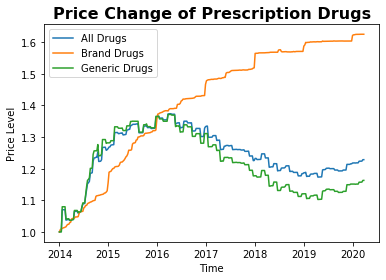

In [69]:
plt.plot(df_total['date'],df_total['All_Drugs'], label="All Drugs")
plt.plot(df_total['date'],df_total['Brand_Drugs'], label="Brand Drugs")
plt.plot(df_total['date'],df_total['Generic_Drugs'], label="Generic Drugs")
#plt.plot(df_total['date'],df_total['ANDA_Drugs'], label="ANDA Drugs")
# Add legend
plt.legend(loc='upper left')
# Add title and x, y labels
plt.title("Price Change of Prescription Drugs", fontsize=16, fontweight='bold')
#plt.suptitle("Random Walk Suptitle", fontsize=10)
plt.xlabel("Time")
plt.ylabel("Price Level")
plt.savefig('Price_Change_of_Prescription_Drugs.png')
plt.show()


In [57]:
df_price_change=df_plot[(df_plot['OTC']=='N')&(df_plot['date']=='2020-03-25')].reset_index()
df_price_change.head()

,index,NDC,date,NDC Description,NADAC_Per_Unit,OTC,Classification_for_Rate_Setting,Price_Level
0,1521809,00002197590,2020-03-25,AXIRON 30 MG/ACTUATION SOLN,6.10851,N,B,1.429483
1,10300429,00002300475,2020-03-25,PROZAC WEEKLY 90 MG CAPSULE,35.48458,N,B,1.009830
2,733709,00002322730,2020-03-25,STRATTERA 10 MG CAPSULE,12.65413,N,B,1.760163
3,5010169,00002322830,2020-03-25,STRATTERA 25 MG CAPSULE,12.65550,N,B,1.759111
4,4035589,00002322930,2020-03-25,STRATTERA 40 MG CAPSULE,13.79693,N,B,1.765108


In [58]:
df_price_change.drop(['date','index'],axis=1)

,NDC,NDC Description,NADAC_Per_Unit,OTC,Classification_for_Rate_Setting,Price_Level
0,00002197590,AXIRON 30 MG/ACTUATION SOLN,6.10851,N,B,1.429483
1,00002300475,PROZAC WEEKLY 90 MG CAPSULE,35.48458,N,B,1.009830
2,00002322730,STRATTERA 10 MG CAPSULE,12.65413,N,B,1.760163
3,00002322830,STRATTERA 25 MG CAPSULE,12.65550,N,B,1.759111
4,00002322930,STRATTERA 40 MG CAPSULE,13.79693,N,B,1.765108
...,...,...,...,...,...,...
18679,99207046630,SOLODYN ER 80 MG TABLET,38.69427,N,B,1.387301
18680,99207046730,SOLODYN ER 105 MG TABLET,38.79789,N,B,1.396853
18681,99207052510,VANOS 0.1% CREAM,25.28700,N,B,2.045288
18682,99207052530,VANOS 0.1% CREAM,30.84737,N,B,2.061476


In [59]:
import seaborn as sns

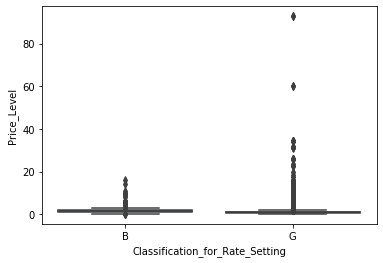

In [60]:
sns.boxplot(y='Price_Level', x='Classification_for_Rate_Setting', 
                 data=df_price_change[df_price_change['Classification_for_Rate_Setting']!='B-ANDA'])

In [61]:
df_price_change.sort_values(by=['Price_Level'],inplace=True)

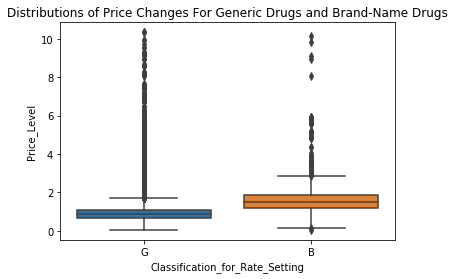

In [67]:
sns.boxplot(y='Price_Level', x='Classification_for_Rate_Setting', 
                 data=df_price_change[df_price_change['Classification_for_Rate_Setting']!='B-ANDA'].iloc[:-100]).set_title('Distributions of Price Changes For Generic Drugs and Brand-Name Drugs')
plt.savefig('Distributions_of_Price_Changes.png')